In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Files
results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv',sep=',')
drivers = pd.read_csv('drivers.csv',encoding='latin-1')
seasons = pd.read_csv('seasons.csv',sep=',')
circuits = pd.read_csv('circuits.csv',encoding='latin-1')
constructors = pd.read_csv('constructors.csv',sep = ',')
constructor_results = pd.read_csv('constructorResults.csv',sep = ',')
laptimes = pd.read_csv('lapTimes.csv',sep = ',')
qual = pd.read_csv('qualifying.csv',sep = ',')


In [3]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN


In [4]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
temp = results.join(races, on='raceId', lsuffix='res', rsuffix='race')

In [6]:
temp2 = temp[temp['year'] > 2008]

In [7]:
temp3 = temp2[['driverId', 'positionOrder', 'date']]

In [8]:
temp4 = temp3[temp3['driverId'] == 1]

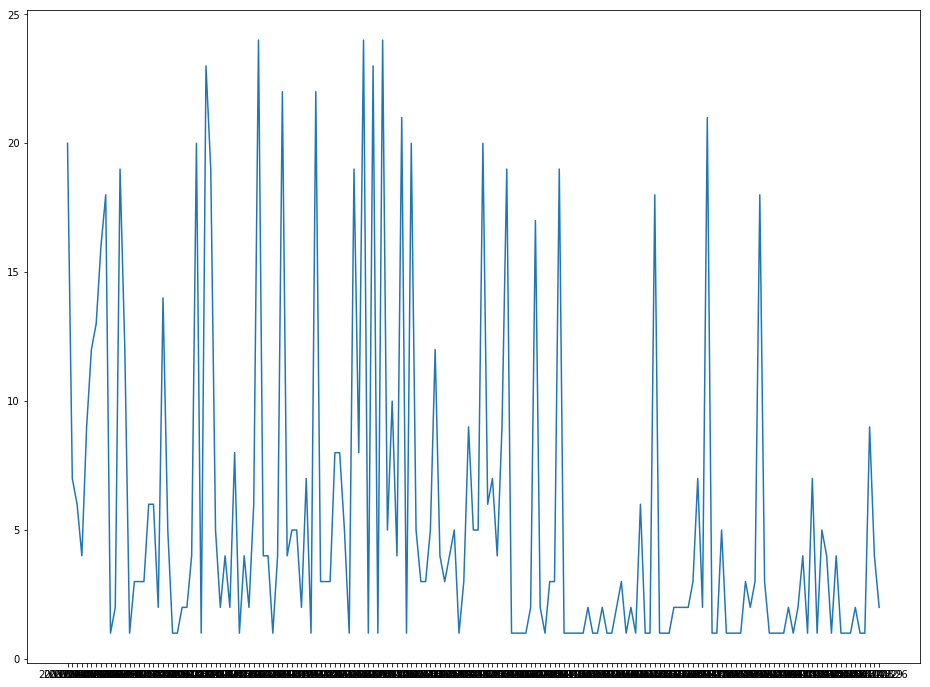

In [9]:
plt.figure(figsize=(16,12))
plt.plot(temp4['date'], temp4['positionOrder'])

In [10]:
temp2.head()

,resultId,raceIdres,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,raceIdrace,year,round,circuitId,name,date,timerace,url
7523,7524,336,137,22,20.0,7,1.0,1,1,9.0,...,NaN,1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...
7524,7525,336,95,6,2.0,3,2.0,2,2,6.0,...,NaN,1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...
7525,7526,336,117,6,1.0,4,3.0,3,3,4.0,...,NaN,1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...
7526,7527,336,77,1,28.0,2,4.0,4,4,3.0,...,NaN,1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...
7527,7528,336,123,3,5.0,9,5.0,5,5,2.0,...,NaN,1,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...


In [11]:
# MERGES
results_with_qual = pd.DataFrame.merge(results, qual,on=['raceId', 'driverId'],how='outer')
results_with_loc_and_year = pd.merge(results_with_qual, races, on = 'raceId' )
results_with_loc_and_year.rename(columns={'driverId_x': 'driverId'}, inplace=True)
results_with_loc_and_year.shape
results_by_driver = pd.merge(results_with_loc_and_year, drivers, on = 'driverId' )
results_by_driver.columns
results_by_driver.rename(columns={'constructorId_x': 'constructorId','position_x':'position'}, inplace=True)
#merged results_by_driver df and constructors df to include constructors names within main dataframe
results_by_driver_team = pd.merge(results_by_driver, constructors, on = 'constructorId')
#renamed columns after merge process
results_by_driver_team.rename(columns={'name_x': 'grand_prix_name', 'name_y': 'Team_Name'}, inplace=True)


In [12]:
df = results_by_driver_team.drop(labels = ['Probability','url_y','url'], axis = 1)
#taking data from 1985 onwards
df = results_by_driver_team[(results_by_driver_team['year'] >= 1991)]
df.shape

(10808, 50)

In [13]:
# rename various columns
df.rename(columns={'constructorId': 'Team_Code','nationality_x':'driver_nationality'}, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [14]:
# When dealing with Neural Nets, use vectors instead of for loops for speed
def sheitzer(pr):

  if pr['Team_Code'] == 1:   #setting up Mclaren based on Team_Code 
    return '1.0'
  if pr['Team_Code'] == 9:  #setting up RedBull based on Team_Code
    return '1.0'
  if pr['Team_Code'] == 131: #setting up Mercedes based on Team_Code
    return '1.0'
  if pr['Team_Code'] == 6:  #setting up Ferrari based on Team_Code
    return '1.0'
  else:
    return '0.50'
df["Probability"] = df.apply(sheitzer, axis = 1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
# see the non numeric column names
df.columns.to_series().groupby(df.dtypes).groups
# Drop unimportan and useless data(url data, driver code, driver numbers, and useless data will be dropped)
df = df.drop(labels = ['code', 'time_x','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','number_y','time_y'], axis = 1)

In [16]:
df.isnull().sum().sort_values(ascending=False)

q3                    8630
number                7361
q2                    7156
milliseconds          7020
fastestLapSpeed       5425
fastestLapTime        5425
fastestLap            5425
rank                  5277
position              3595
q1                    3411
position_y            3292
constructorId_y       3292
qualifyId             3292
laps                     0
positionOrder            0
positionText             0
grid                     0
number_x                 0
Team_Code                0
driverId                 0
statusId                 0
raceId                   0
points                   0
Probability              0
url                      0
surname                  0
nationality_y            0
Team_Name                0
constructorRef           0
url_y                    0
driver_nationality       0
dob                      0
forename                 0
year                     0
driverRef                0
url_x                    0
date                     0
g

In [17]:
# create features for time
df['milliseconds'] = df['milliseconds']
df['seconds'] = df['milliseconds']/1000 % 60
df['minutes'] = df['milliseconds']/(1000 * 60) % 60
df['hours'] = df['milliseconds']/(1000 * 60 * 60) % 24

# convert Date of Birth to indicate year born only.  
df['dob'] = df['dob'].str[-4:]

In [18]:
df.isnull().sum().sort_values(ascending=False)

q3                    8630
number                7361
q2                    7156
milliseconds          7020
minutes               7020
hours                 7020
seconds               7020
fastestLapSpeed       5425
fastestLapTime        5425
fastestLap            5425
rank                  5277
position              3595
q1                    3411
constructorId_y       3292
position_y            3292
qualifyId             3292
laps                     0
points                   0
positionOrder            0
positionText             0
grid                     0
number_x                 0
Team_Code                0
driverId                 0
raceId                   0
statusId                 0
Team_Name                0
constructorRef           0
driverRef                0
url_y                    0
driver_nationality       0
dob                      0
surname                  0
forename                 0
nationality_y            0
url_x                    0
Probability              0
d

In [19]:
qual_null_fills=['position_y','number','constructorId_y','qualifyId','q1','q2','q3','position','seconds','minutes','hours','fastestLap','fastestLapTime','fastestLapSpeed','rank','milliseconds']
for i in qual_null_fills:
    filtering=df[i].isnull()
    df.loc[filtering,i]='0'   
 #dominant type

In [20]:

# # filling the null values
# future['total_onshift_dashers'].fillna(future['total_onshift_dashers'].mean(), inplace=True)
# future['total_busy_dashers'].fillna(future['total_busy_dashers'].mean(), inplace=True)
# future['total_outstanding_orders'].fillna(future['total_outstanding_orders'].mean(), inplace=True)
# future['estimated_store_to_consumer_driving_duration'].fillna(future['estimated_store_to_consumer_driving_duration'].mean(), inplace=True)


In [21]:
#column names by type
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['resultId', 'raceId', 'driverId', 'Team_Code', 'grid', 'positionOrder',
        'laps', 'statusId', 'year', 'round', 'circuitId'],
       dtype='object'),
 dtype('float64'): Index(['number_x', 'points'], dtype='object'),
 dtype('O'): Index(['position', 'positionText', 'milliseconds', 'fastestLap', 'rank',
        'fastestLapTime', 'fastestLapSpeed', 'qualifyId', 'constructorId_y',
        'position_y', 'q1', 'q2', 'q3', 'grand_prix_name', 'date', 'url_x',
        'driverRef', 'number', 'forename', 'surname', 'dob',
        'driver_nationality', 'url_y', 'constructorRef', 'Team_Name',
        'nationality_y', 'url', 'Probability', 'seconds', 'minutes', 'hours'],
       dtype='object')}

In [22]:
df.isnull().sum()

resultId              0
raceId                0
driverId              0
Team_Code             0
number_x              0
grid                  0
position              0
positionText          0
positionOrder         0
points                0
laps                  0
milliseconds          0
fastestLap            0
rank                  0
fastestLapTime        0
fastestLapSpeed       0
statusId              0
qualifyId             0
constructorId_y       0
position_y            0
q1                    0
q2                    0
q3                    0
year                  0
round                 0
circuitId             0
grand_prix_name       0
date                  0
url_x                 0
driverRef             0
number                0
forename              0
surname               0
dob                   0
driver_nationality    0
url_y                 0
constructorRef        0
Team_Name             0
nationality_y         0
url                   0
Probability           0
seconds         

In [23]:
df = df.drop(labels = ['url_y','positionText','url_x','url','number_x'], axis = 1)

In [24]:
df.head()

,resultId,raceId,driverId,Team_Code,grid,position,positionOrder,points,laps,milliseconds,...,surname,dob,driver_nationality,constructorRef,Team_Name,nationality_y,Probability,seconds,minutes,hours
0,1,18,1,1,1,1,1,10.0,58,5.69062e+06,...,Hamilton,1985,British,mclaren,McLaren,British,1.0,50.616,34.8436,1.58073
1,27,19,1,1,9,5,5,4.0,56,5.5251e+06,...,Hamilton,1985,British,mclaren,McLaren,British,1.0,5.103,32.085,1.53475
2,57,20,1,1,3,13,13,0.0,56,0,...,Hamilton,1985,British,mclaren,McLaren,British,1.0,0,0,0
3,69,21,1,1,5,3,3,6.0,66,5.90324e+06,...,Hamilton,1985,British,mclaren,McLaren,British,1.0,23.238,38.3873,1.63979
4,90,22,1,1,3,2,2,8.0,58,5.21323e+06,...,Hamilton,1985,British,mclaren,McLaren,British,1.0,53.23,26.8872,1.44812


In [25]:
df1 = df.groupby(['constructorRef','year','Team_Code'])['points'].sum().reset_index()
df1.rename(columns = {'points':'team_point_sum'}, inplace = True)
# df1 = df1.groupby(['team_point_sum','year']).sum().reset_index()
df1
# g['count'] = g['country'].map(df['country'].value_counts())

,constructorRef,year,Team_Code,team_point_sum
0,ags,1991,39,0.0
1,arrows,1997,21,9.0
2,arrows,1998,21,6.0
3,arrows,1999,21,1.0
4,arrows,2000,21,7.0
5,arrows,2001,21,1.0
6,arrows,2002,21,2.0
7,bar,1999,16,0.0
8,bar,2000,16,20.0
9,bar,2001,16,17.0


In [31]:
df2 = df.groupby(['year','Team_Code'])['points'].sum().reset_index()
df2.rename(columns = {'points':'team_point_sum'}, inplace = True)
df2['Rank'] = df2.groupby(['year'])['team_point_sum'].rank(ascending=False)
df = pd.DataFrame.merge(df, df2, on=['year', 'Team_Code'],how='outer')

In [32]:
df = pd.get_dummies(df, columns=['positionOrder'], prefix='position')
df = pd.get_dummies(df, columns=['Team_Name'], prefix='Team')
df = pd.get_dummies(df, columns=['driver_nationality'], prefix='driver_nationality')

In [33]:
df.to_csv('../data/formula1.csv')